# GERMANY

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)
import plotly
import plotly.express as px

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

## Uppgift 1 - Landstatistik 

In [307]:
germany, germany_all = Functions.hashed_names(olympics)
germany = germany.reset_index(drop=True)
germany.head(5)

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


### De sporter tyskland fått mest medaljer i

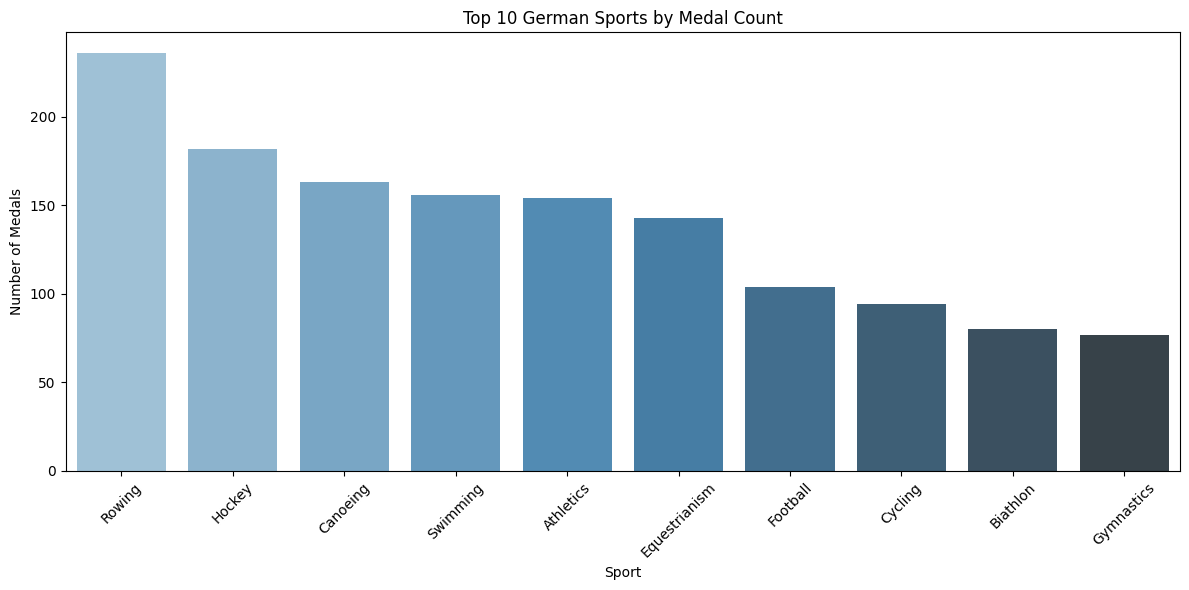

In [308]:
top10ports = Functions.top_german_sports(germany_df = germany, top_n = 10)

### Antal medaljer per OS

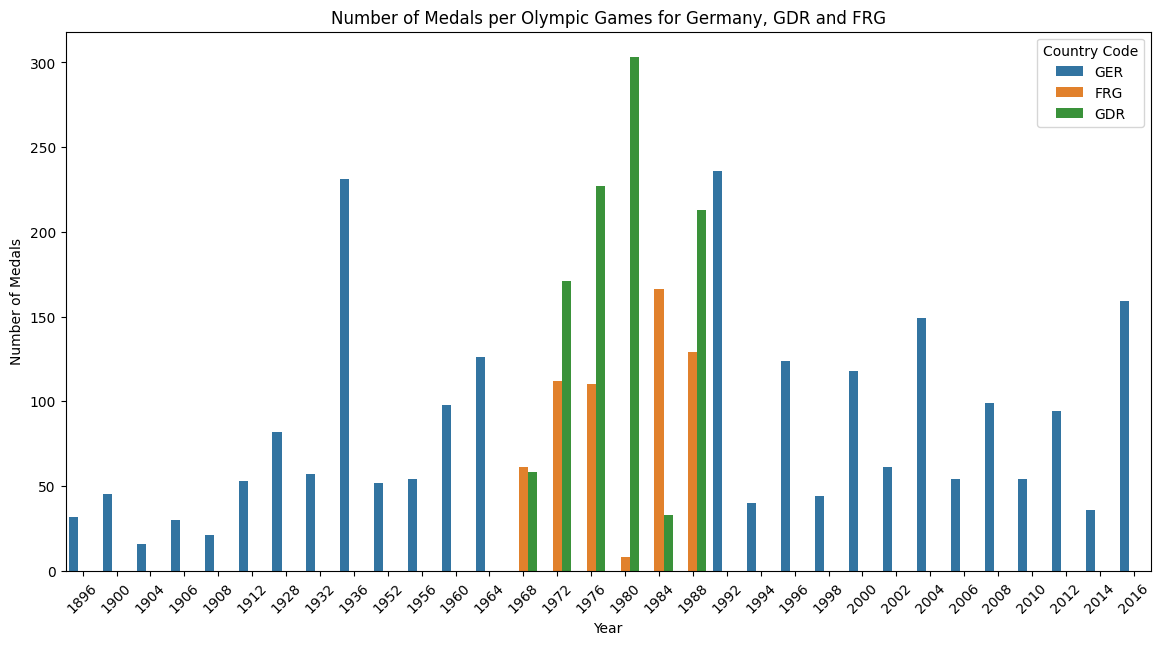

In [309]:
Functions.medals_each_year(olympics, ["GER", "GDR", "FRG"], "Number of Medals per Olympic Games for Germany, GDR and FRG")


### Histogram över åldrar

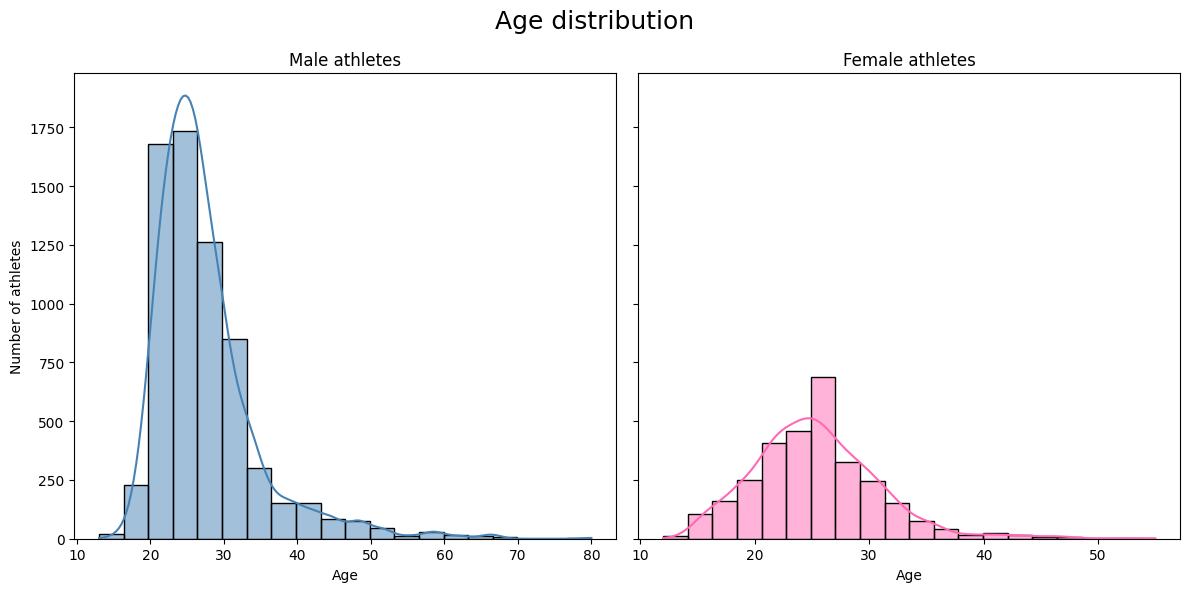

In [310]:
germany_age = germany[germany['Age'].notna()]
male = germany_age[germany_age['Sex'] == 'M']
female = germany_age[germany_age['Sex'] == 'F']

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

sns.histplot(male['Age'], bins=20, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title('Male athletes')

sns.histplot(female['Age'], bins=20, kde=True, color='hotpink', ax=axes[1])
axes[1].set_title('Female athletes')

for ax in axes:
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of athletes')

plt.suptitle('Age distribution', fontsize=18)
plt.tight_layout()

### Väst och Öst-Tyskland

In [311]:
east_germany = germany_all[germany_all['NOC'] == 'GDR'].copy()
west_germany = germany_all[germany_all['NOC'] == 'FRG'].copy()

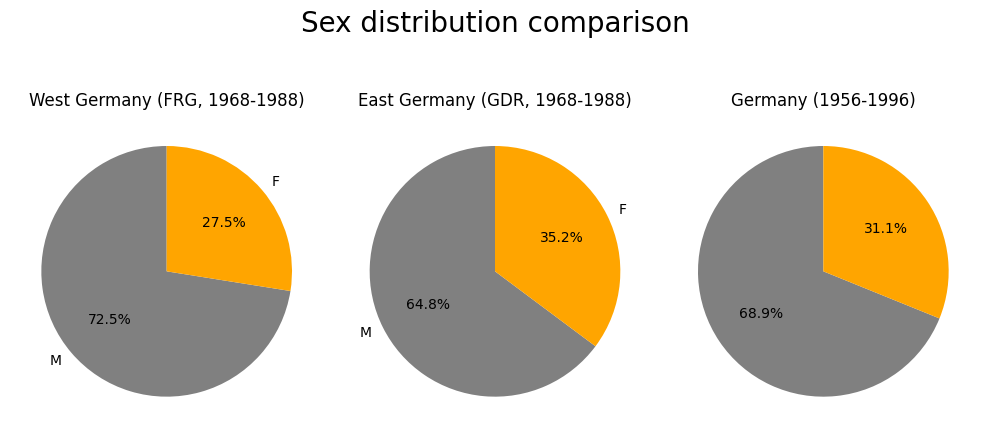

In [312]:
east_sex = east_germany['Sex'].value_counts()
west_sex = west_germany['Sex'].value_counts()
germany_sex_compare = germany[germany['Year'].between(1956, 1996)] #Tre OS innan och efter splittringen för någorlunda värdig jämförelse

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Sex distribution comparison', fontsize=20)
axes[0].pie(west_sex, labels = west_sex.index, autopct='%1.1f%%', startangle=90, colors = ['grey', 'orange'])
axes[0].set_title('West Germany (FRG, 1968-1988)')
axes[1].pie(east_sex, labels = east_sex.index, autopct='%1.1f%%', startangle=90, colors = ['grey', 'orange'])
axes[1].set_title('East Germany (GDR, 1968-1988)')
axes[2].pie(germany_sex_compare['Sex'].value_counts(), autopct = '%1.1f%%', startangle=90, colors = ['grey', 'orange'])
axes[2].set_title('Germany (1956-1996)')
plt.tight_layout()

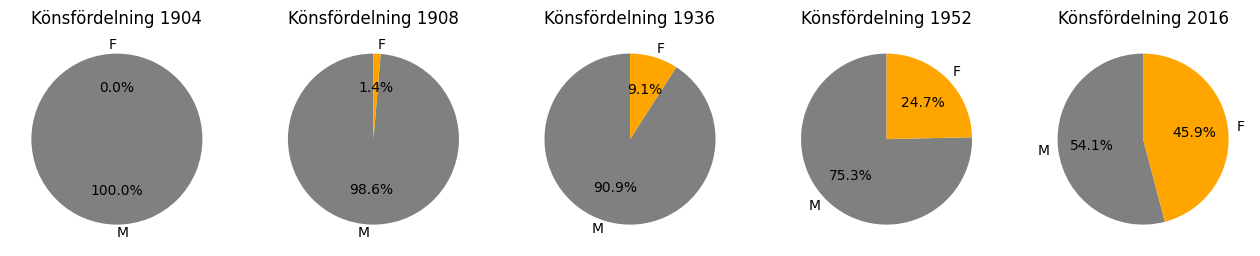

In [313]:
Functions.sex_dist_years(germany, [1904, 1908, 1936, 1952, 2016])

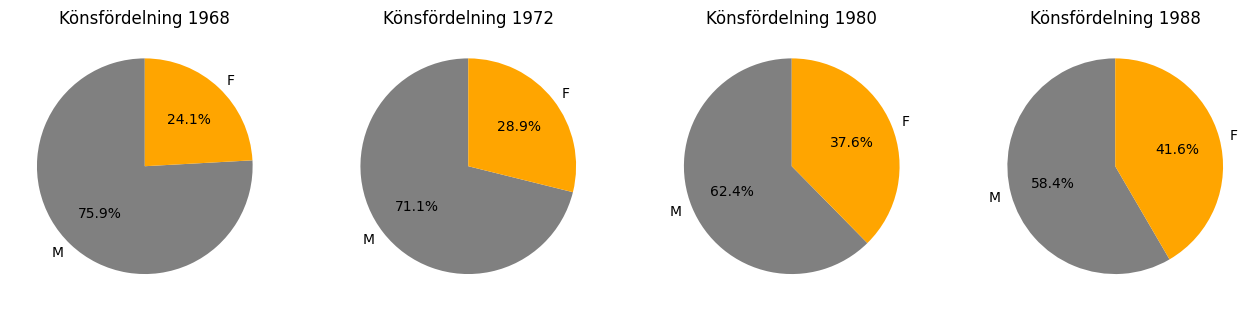

In [314]:
Functions.sex_dist_years(east_germany, years=[1968, 1972, 1980, 1988])

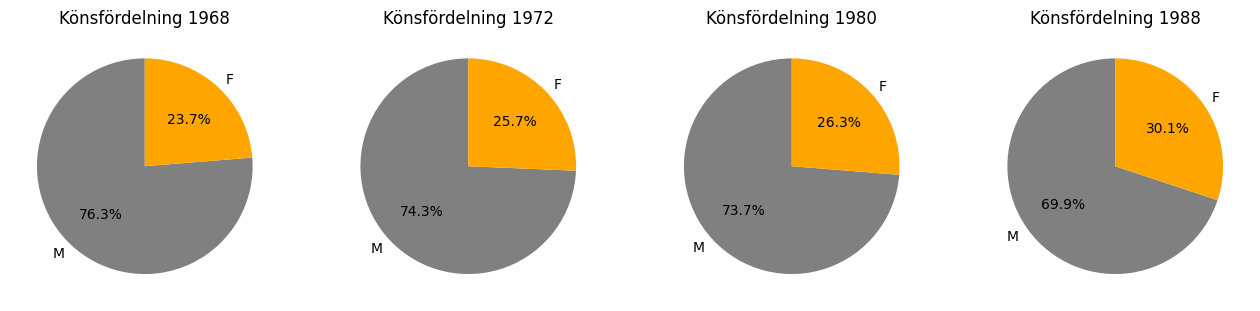

In [315]:
Functions.sex_dist_years(west_germany, years=[1968, 1972, 1980, 1988])

In [316]:
participants = germany_all.groupby(["Year", "NOC", "Season"])["Hash_Names"].nunique().reset_index(name='Participants')

fig = px.line(participants,
              x = 'Year', 
              y = 'Participants', 
              color = 'NOC', 
              line_dash='Season',
              title='Participants over the years')

fig.update_layout(
    title={'text' : 'German participants through the years','x':0.5,'xanchor':'center'},
    xaxis_title='År', yaxis_title='Antal deltagare', legend_title='Nation'
)

### Jämförelse mellan antal medaljer under sommar och vinter

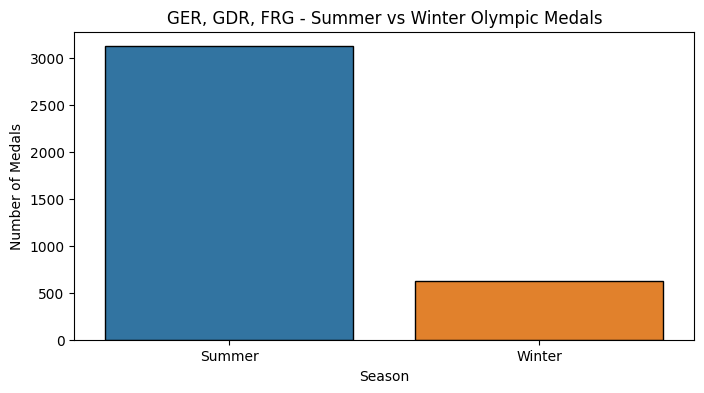

In [317]:
Functions.plot_summer_vs_winter(olympics)

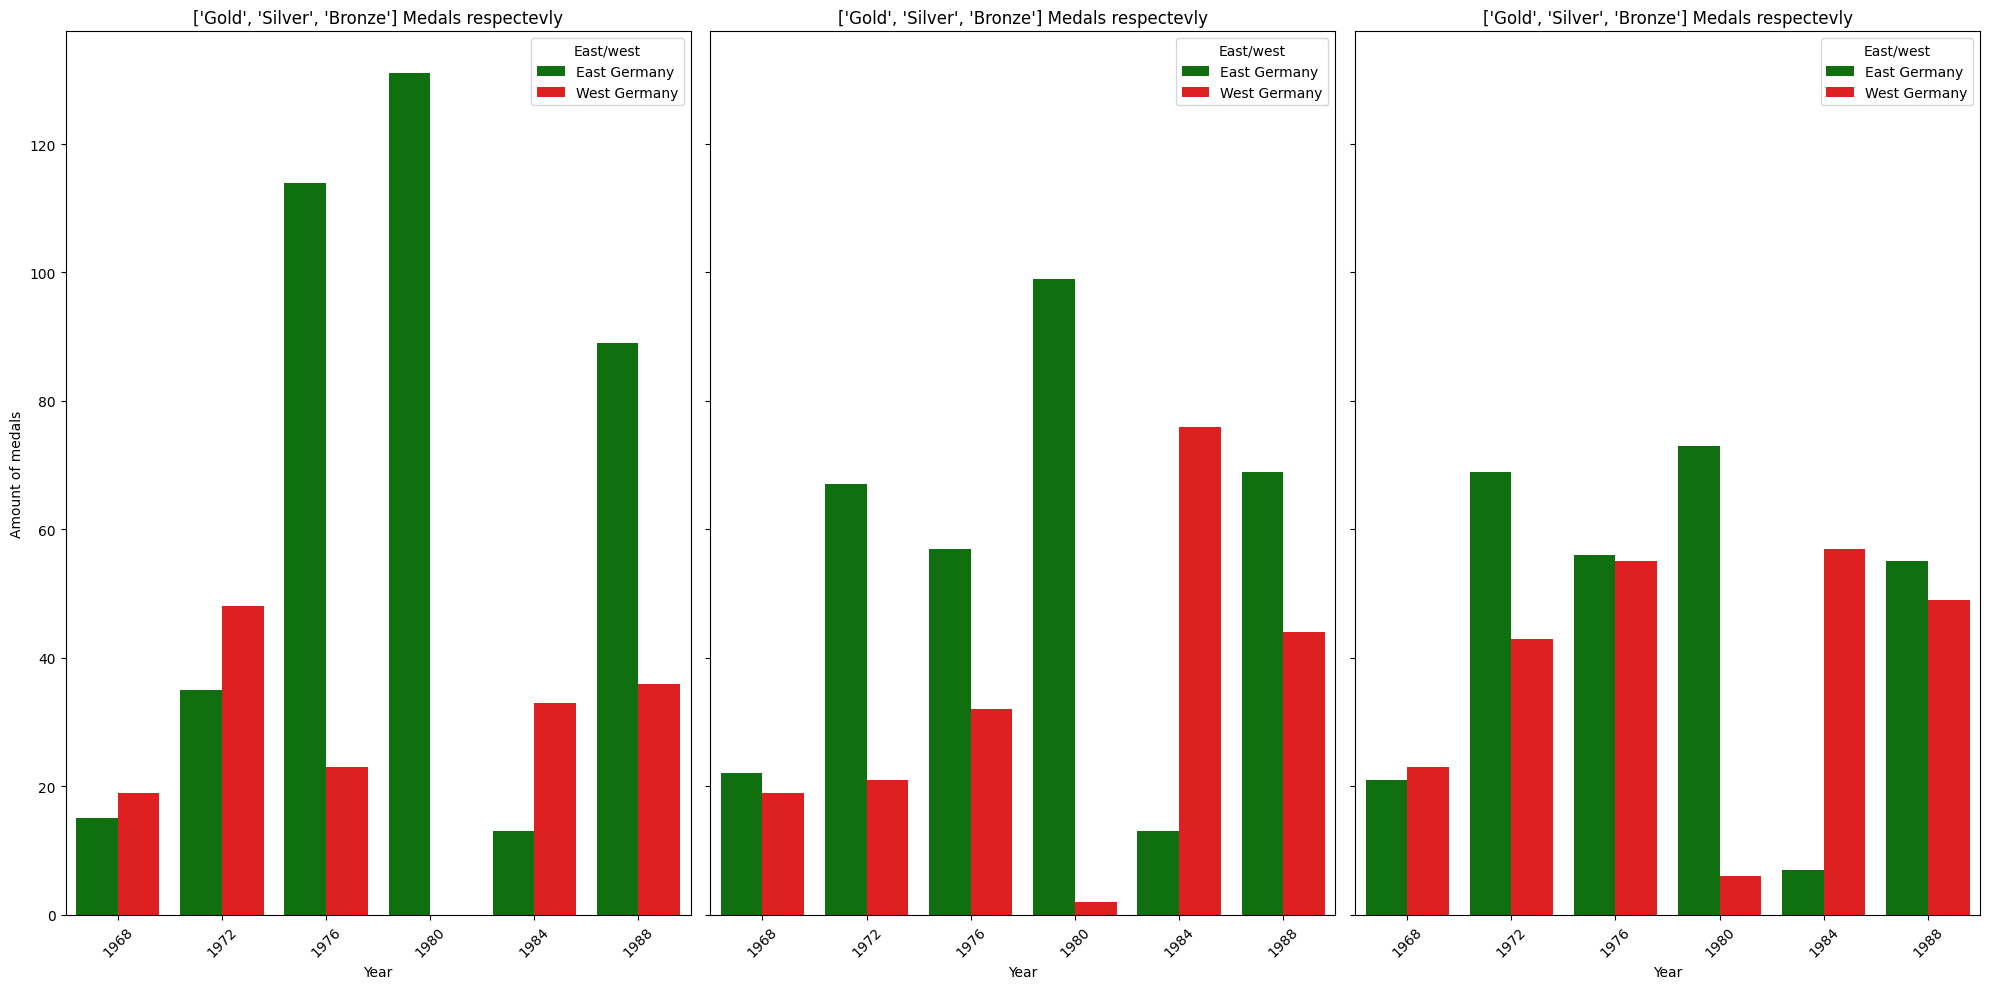

In [318]:
east = east_germany[['Year', 'Medal']].dropna(subset=['Medal'])
east_medals = east.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
east_medals

west = west_germany[['Year', 'Medal']].dropna(subset=['Medal'])
west_medals = west.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

fallen_years = sorted(set(west_medals.index).union(set(east_medals.index)))
Dif_medals = ['Gold', 'Silver', 'Bronze']

fig, axes= plt.subplots(1,3, figsize=(20,10),sharey=True)


for i, medal in enumerate (Dif_medals):
    ax = axes[i]
    plotting = pd.DataFrame({'Year': fallen_years, 'East Germany':east_medals[medal].values,'West Germany': west_medals[medal].values})

    medal_molten = plotting.melt(id_vars='Year', var_name='East/west', value_name= 'Number of medals')
    sns.barplot(data=medal_molten,x='Year', y='Number of medals', ax=ax, hue='East/west', palette= {'East Germany': 'green', 'West Germany': 'red'})
    ax.set_title(f'{Dif_medals} Medals respectevly')
    ax.set_xlabel('Year')
    ax.set_ylabel('Amount of medals')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


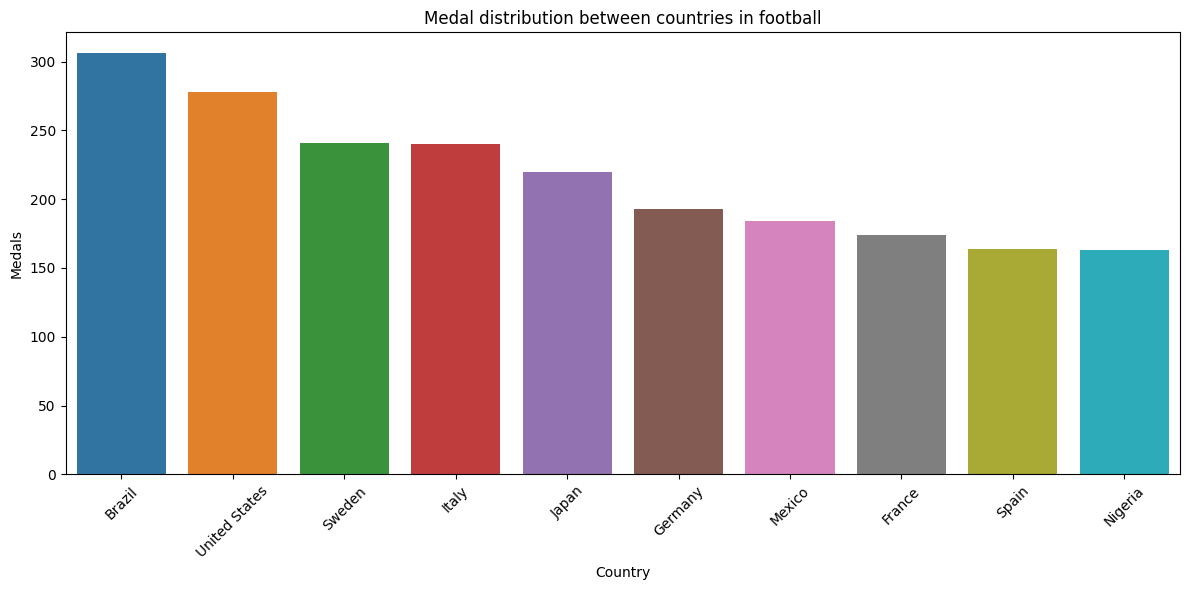

In [319]:
football = olympics[olympics['Sport'] == 'Football'].copy()
football_medals = football[football['Team'].notna()].copy()

medals_by_country = football_medals["Team"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values, palette='tab10', hue=medals_by_country.index, legend=False)
plt.title("Medal distribution between countries in football")
plt.ylabel("Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

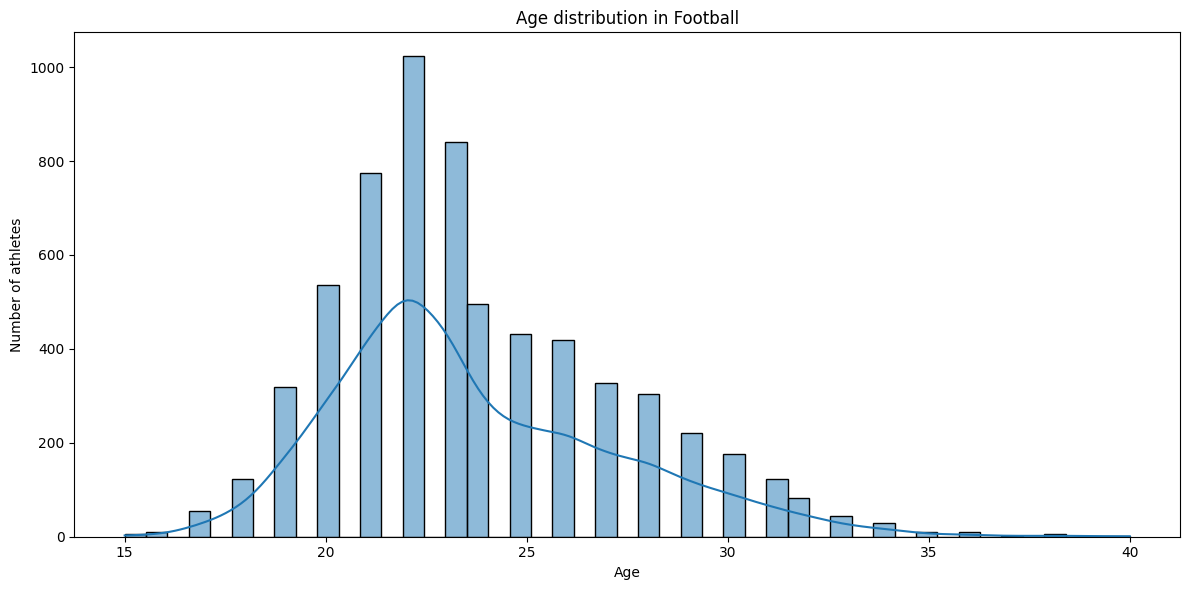

In [320]:
plt.figure(figsize=(12,6))
sns.histplot(data=football, x='Age', kde=True)
plt.title("Age distribution in Football")
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.tight_layout()
plt.show()

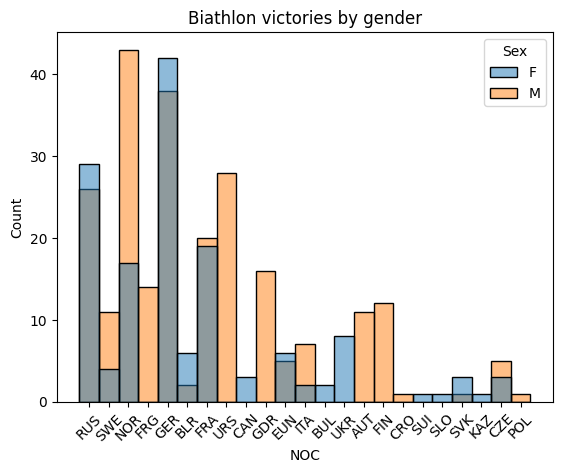

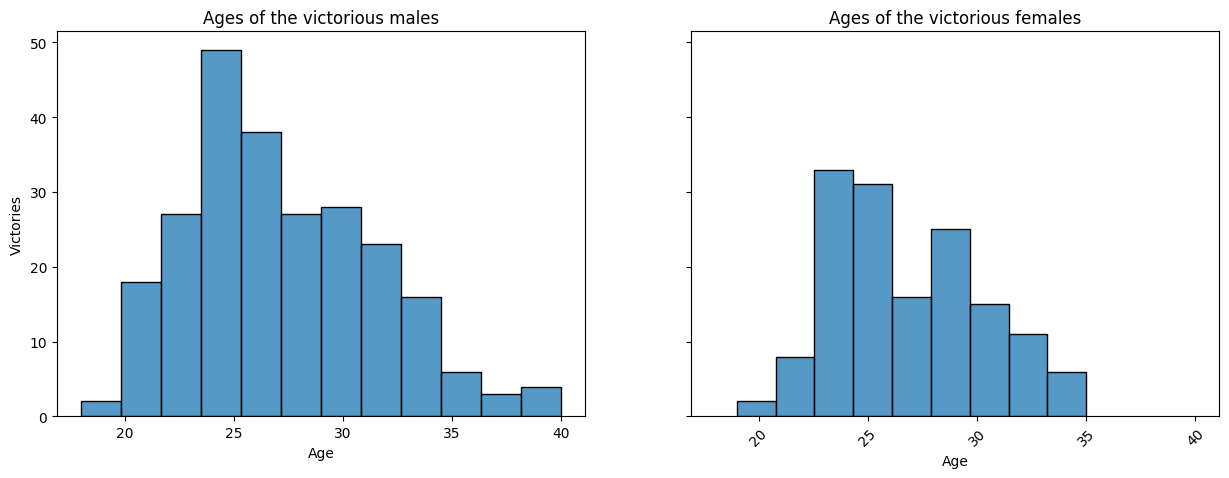

In [321]:
Biat= olympics[olympics['Sport']== 'Biathlon']
Biat=Biat.dropna()
M_Biat = Biat[Biat['Sex']== 'M']
F_Biat = Biat[Biat['Sex']== 'F']


sns.histplot(data=Biat, x='NOC', hue='Sex')
plt.title('Biathlon victories by gender')
plt.xticks(rotation=45)
plt.show()

fig, axes= plt.subplots(1,2, figsize=(15,5),sharey=True, sharex=True)
sns.histplot(data=M_Biat, x= 'Age', ax = axes[0])
axes[0].set_title('Ages of the victorious males')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Victories')
plt.xticks(rotation = 45)
sns.histplot(data=F_Biat, x= 'Age', ax = axes[1])
axes[1].set_title('Ages of the victorious females')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Victories')
plt.xticks(rotation = 45)
plt.show()

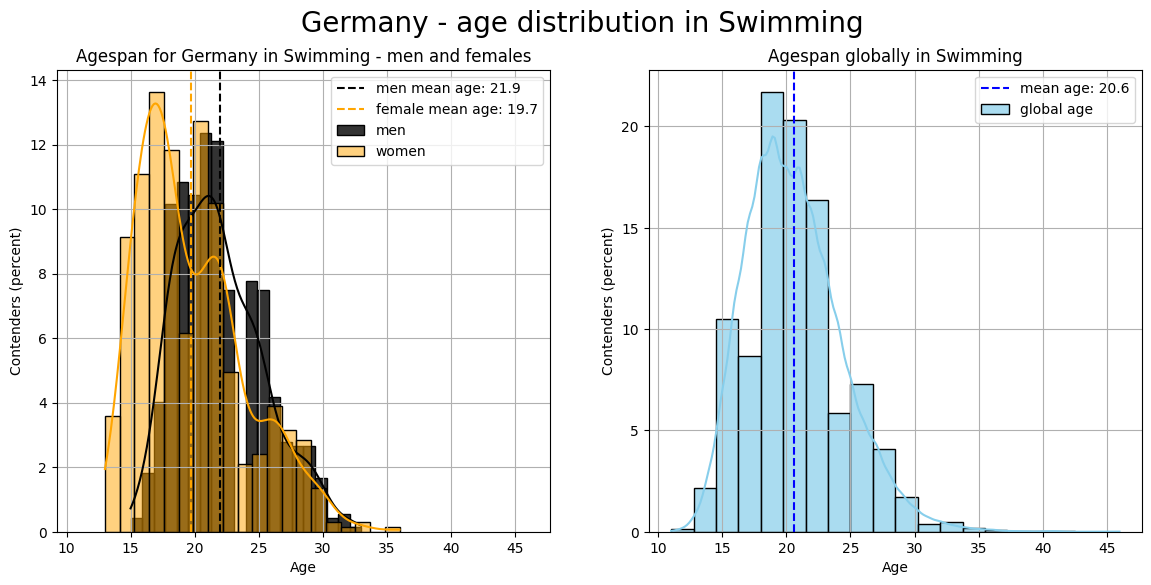

In [322]:
Functions.age_dist_per_sex(olympics, germany_all, country='Germany', sport='Swimming')

In [323]:
Functions.plot_efficiency(olympics, germany_all, country='Germany', sport='Swimming')

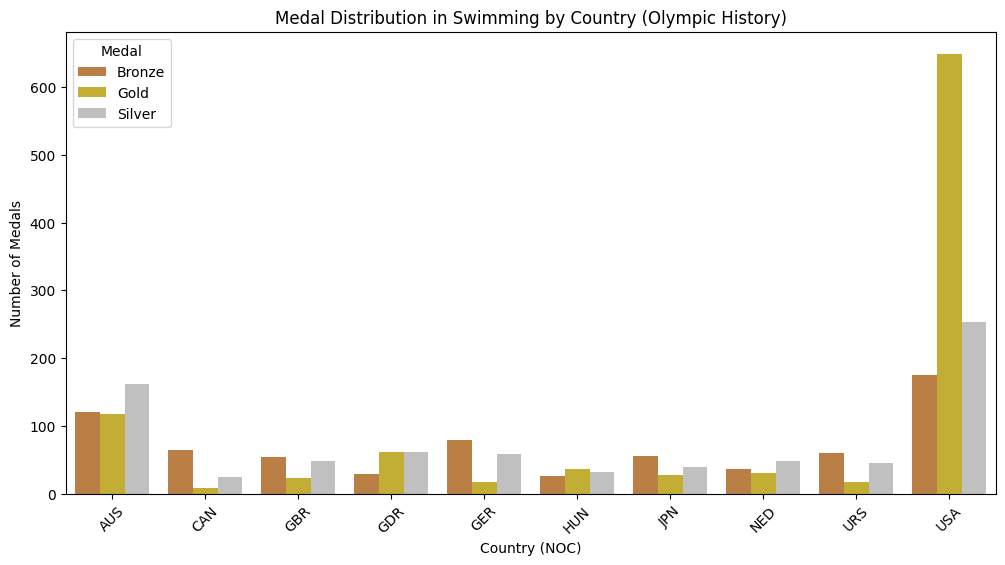

In [324]:
Functions.medal_distribution(olympics_df=olympics, sport='Swimming')

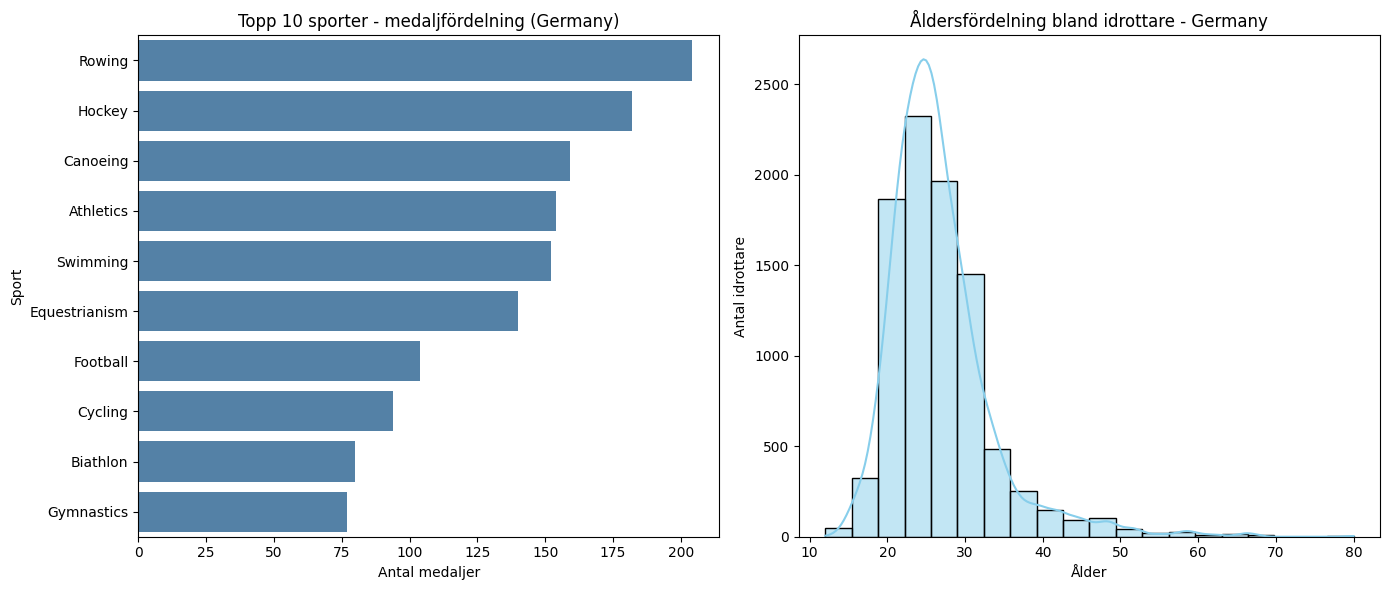

In [325]:
Functions.visualize_country_stats(olympics, "Germany")

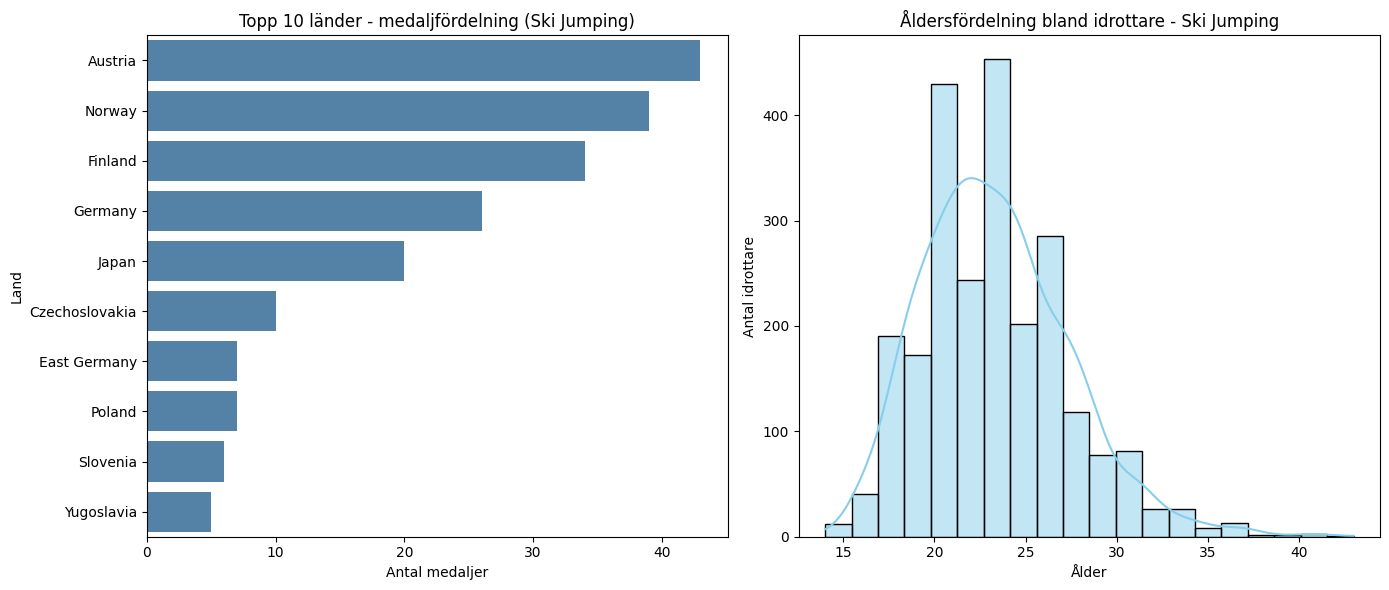

In [326]:
Functions.visualize_sport_stats(olympics, "Ski Jumping")